In [1]:
#Dependencies and Setup

import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st 
import matplotlib.ticker as ticker

#Import the CSVs

country_path = "archive/co2_emissions_kt_by_country.csv"
population_path = "archive/population_by_country.csv"

country_data = pd.read_csv(country_path)
population_data = pd.read_csv(population_path)

country_data.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [2]:
population = population_data.sort_values(["country_code"])
population.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,54608.0
33,ABW,Aruba,1993,72360.0
34,ABW,Aruba,1994,74710.0
35,ABW,Aruba,1995,77050.0
36,ABW,Aruba,1996,79417.0


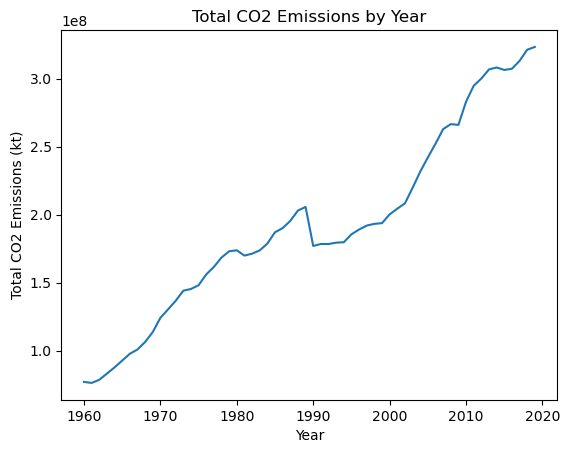

In [3]:
total_country_emissions_per_year = country_data.groupby("year")["value"].sum()
total_country_emissions_per_year

#Creating a line plot to visulize the total data set grouped by year

country_x_axis = total_country_emissions_per_year.index
country_y_axis = total_country_emissions_per_year.values

plt.plot(country_x_axis,country_y_axis)

plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions (kt)")
plt.title("Total CO2 Emissions by Year")

plt.show()

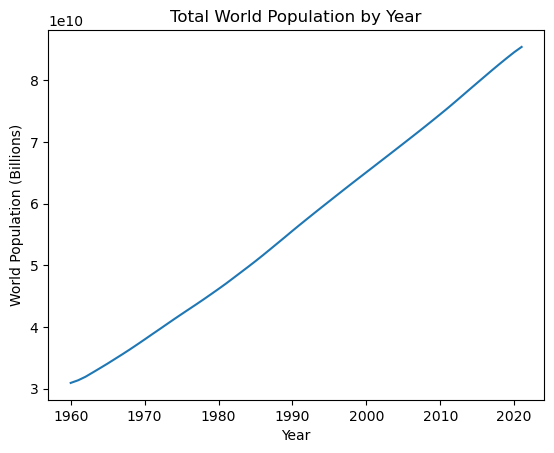

In [4]:
population_by_year = population_data.groupby("year")["value"].sum()
population_by_year

#Creating a line plot to visulize the total data set grouped by year

pop_x_axis = population_by_year.index
pop_y_axis = population_by_year.values

plt.plot(pop_x_axis,pop_y_axis)

plt.xlabel("Year")
plt.ylabel("World Population (Billions)")
plt.title("Total World Population by Year")

plt.show()

In [5]:
#merge the dfs to create a new one 
country_results_merged_df = pd.merge(population_data, country_data, how = "left", on = ["country_code", "year", "country_name"])

#rename the columns
country_results_merged_df.rename(columns = 
    {
    "value_x": "population",
    "value_y": "emissions (kt)"
    }, inplace = True)

country_results_merged_df.head()


,country_code,country_name,year,population,emissions (kt)
0,ABW,Aruba,1960,54608.0,11092.675
1,ABW,Aruba,1961,55811.0,11576.719
2,ABW,Aruba,1962,56682.0,12713.489
3,ABW,Aruba,1963,57475.0,12178.107
4,ABW,Aruba,1964,58178.0,11840.743


In [6]:
#Getting rid of all NaN columns
print(country_results_merged_df[country_results_merged_df.isnull().any(axis=1)])

country_results_merged_df = country_results_merged_df.dropna(how = "any")

country_results_merged_df.head()

      country_code country_name  year  population  emissions (kt)
57             ABW        Aruba  2017    105439.0             NaN
58             ABW        Aruba  2018    105962.0             NaN
59             ABW        Aruba  2019    106442.0             NaN
60             ABW        Aruba  2020    106585.0             NaN
61             ABW        Aruba  2021    106537.0             NaN
...            ...          ...   ...         ...             ...
16339          ZWE     Zimbabwe  1961   3925952.0             NaN
16340          ZWE     Zimbabwe  1962   4049778.0             NaN
16341          ZWE     Zimbabwe  1963   4177931.0             NaN
16398          ZWE     Zimbabwe  2020  15669666.0             NaN
16399          ZWE     Zimbabwe  2021  15993524.0             NaN

[2477 rows x 5 columns]


,country_code,country_name,year,population,emissions (kt)
0,ABW,Aruba,1960,54608.0,11092.675
1,ABW,Aruba,1961,55811.0,11576.719
2,ABW,Aruba,1962,56682.0,12713.489
3,ABW,Aruba,1963,57475.0,12178.107
4,ABW,Aruba,1964,58178.0,11840.743


In [7]:
country_results_merged_df['emissions (tons)'] = country_results_merged_df['emissions (kt)'] * 1000
country_results_merged_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons)
0,ABW,Aruba,1960,54608.0,11092.675,11092675.0
1,ABW,Aruba,1961,55811.0,11576.719,11576719.0
2,ABW,Aruba,1962,56682.0,12713.489,12713489.0
3,ABW,Aruba,1963,57475.0,12178.107,12178107.0
4,ABW,Aruba,1964,58178.0,11840.743,11840743.0


In [8]:
country_results_merged_df['emissions per capita (t)'] = country_results_merged_df['emissions (tons)'] / country_results_merged_df['population']
country_results_merged_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
0,ABW,Aruba,1960,54608.0,11092.675,11092675.0,203.132783
1,ABW,Aruba,1961,55811.0,11576.719,11576719.0,207.427192
2,ABW,Aruba,1962,56682.0,12713.489,12713489.0,224.294997
3,ABW,Aruba,1963,57475.0,12178.107,12178107.0,211.885289
4,ABW,Aruba,1964,58178.0,11840.743,11840743.0,203.526127


# formatting turns everything into strings

In [9]:

#Formatting the columns 
country_results_merged_df["population"] = country_results_merged_df["population"].map("{:,.0f}".format)

country_results_merged_df["emissions (kt)"] = country_results_merged_df["emissions (kt)"].map("{:,.4f}".format)
country_results_merged_df["emissions per capita (t)"] = country_results_merged_df["emissions per capita (t)"].map("{:,.4f}".format)

#Resets the index since we drop columns
country_results_merged_df.reset_index(drop = True)

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
0,ABW,Aruba,1960,"54,608","11,092.6750",1.109268e+07,203.1328
1,ABW,Aruba,1961,"55,811","11,576.7190",1.157672e+07,207.4272
2,ABW,Aruba,1962,"56,682","12,713.4890",1.271349e+07,224.2950
3,ABW,Aruba,1963,"57,475","12,178.1070",1.217811e+07,211.8853
4,ABW,Aruba,1964,"58,178","11,840.7430",1.184074e+07,203.5261
...,...,...,...,...,...,...,...
13918,ZWE,Zimbabwe,2015,"14,154,937","12,430.0003",1.243000e+07,0.8781
13919,ZWE,Zimbabwe,2016,"14,452,704","11,020.0005",1.102000e+07,0.7625
13920,ZWE,Zimbabwe,2017,"14,751,101","10,340.0002",1.034000e+07,0.7010
13921,ZWE,Zimbabwe,2018,"15,052,184","12,380.0001",1.238000e+07,0.8225


In [10]:
sorted_df = country_results_merged_df.sort_values("emissions per capita (t)", ascending=True)
sorted_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
12750,SEN,Senegal,1968,"4,117,659",-80.6740,-80674.0,-0.0196
14634,TLS,Timor-Leste,1992,"783,705",0.0000,0.0,0.0000
14637,TLS,Timor-Leste,1995,"819,226",0.0000,0.0,0.0000
14639,TLS,Timor-Leste,1997,"843,341",0.0000,0.0,0.0000
14640,TLS,Timor-Leste,1998,"855,409",0.0000,0.0,0.0000


In [11]:
sorted2019 = sorted_df.loc[sorted_df["year"] == 2019]
sorted2019_ascending = sorted2019.sort_values("emissions per capita (t)", ascending=False)
sorted2019_ascending.drop([5949,12243], axis =0, inplace= True)
sorted2019_ascending.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
3407,CZE,Czechia,2019,"10,671,870","96,290.0009",9.629000e+07,9.0228
8181,LBY,Libya,2019,"6,569,088","56,799.9992",5.680000e+07,8.6466
7375,JPN,Japan,2019,"126,633,000","1,081,569.9463",1.081570e+09,8.5410
11219,OED,OECD members,2019,"1,362,922,537","11,610,640.1645",1.161064e+10,8.5189
10909,NLD,Netherlands,2019,"17,344,874","146,339.9963",1.463400e+08,8.4371


country_name
Burundi        0.0606
Czechia        9.0228
Japan           8.541
Kenya          0.4373
Netherlands    8.4371
Rwanda         0.1036
Name: emissions per capita (t), dtype: object


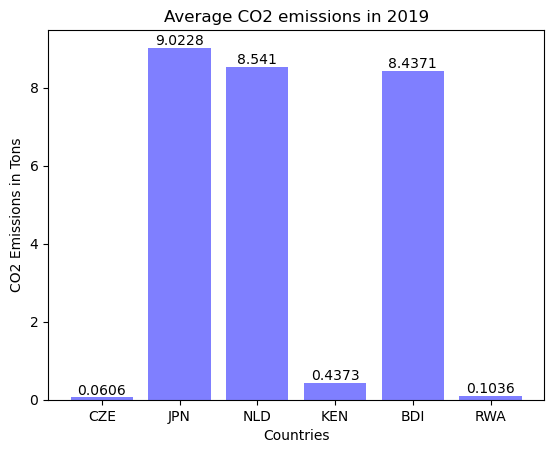

In [12]:
countries_wewant = ['CZE', 'JPN', 'NLD', 'KEN', 'BDI', 'RWA']
countriesofinterest = sorted2019.loc[sorted2019['country_code'].isin(countries_wewant)]
countries2019 = countriesofinterest.groupby(['country_name'])['emissions per capita (t)'].mean()
print(countries2019)

emissions_xaxis = countries_wewant
emissions_yaxis = countries2019
plt.bar(emissions_xaxis, emissions_yaxis, color='b', alpha=0.5, align='center')

for i, v in enumerate(emissions_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Average CO2 emissions in 2019')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Tons')

plt.show()


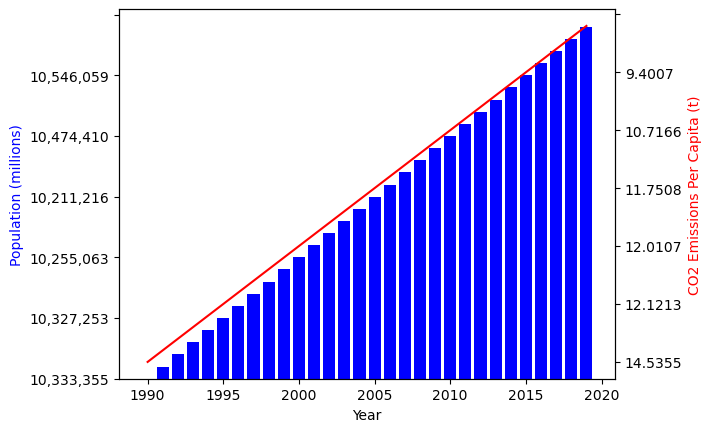

In [13]:
# Single country df
czechia_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Czechia']

# First plot, left hand side
czechia_tickspacing_y1 = 5
czechia_tickspacing_y2 = 5
fig, ax1 = plt.subplots()
ax1.bar(czechia_data['year'], czechia_data['population'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color='blue')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(czechia_tickspacing_y1))

# Second plot, right hand side
ax2 = ax1.twinx()
ax2.plot(czechia_data['year'], czechia_data['emissions per capita (t)'], color='red')
ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(czechia_tickspacing_y2))

plt.show()

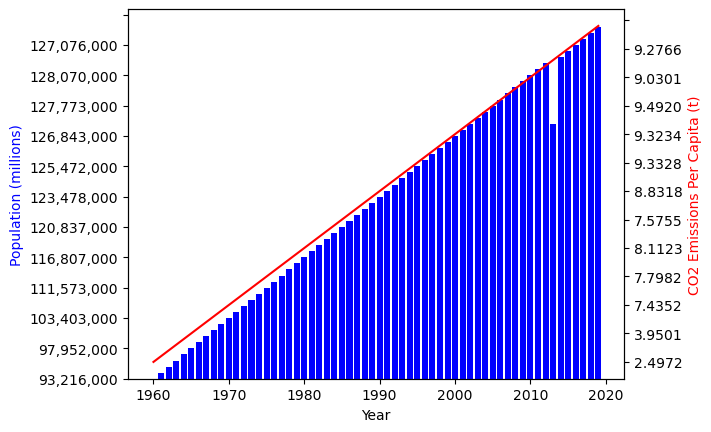

In [14]:
# Single country df
japan_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Japan']

# First plot, left hand side
japan_tickspacing_y1 = 5
japan_tickspacing_y2 = 5
fig, ax1 = plt.subplots()
ax1.bar(japan_data['year'], japan_data['population'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color='blue')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(japan_tickspacing_y1))

# Second plot, right hand side
ax2 = ax1.twinx()
ax2.plot(japan_data['year'], japan_data['emissions per capita (t)'], color='red')
ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(japan_tickspacing_y2))

plt.show()

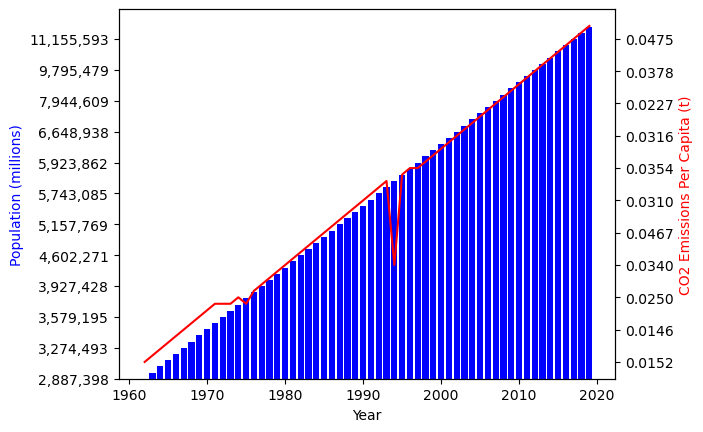

In [15]:
# Single country df
burundi_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Burundi']

# First plot, left hand side
burundi_tickspacing_y1 = 5
burundi_tickspacing_y2 = 5
fig, ax1 = plt.subplots()
ax1.bar(burundi_data['year'], burundi_data['population'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color='blue')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(burundi_tickspacing_y1))

# Second plot, right hand side
ax2 = ax1.twinx()
ax2.plot(burundi_data['year'], burundi_data['emissions per capita (t)'], color='red')
ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(burundi_tickspacing_y2))

plt.show()

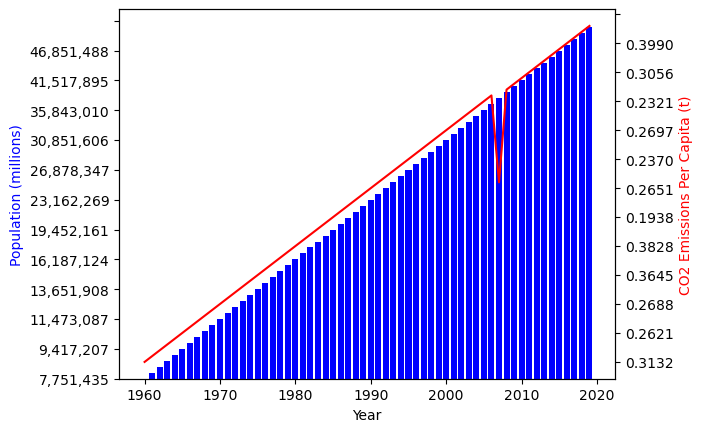

In [16]:
# Single country df
kenya_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Kenya']

# First plot, left hand side
kenya_tickspacing_y1 = 5
kenya_tickspacing_y2 = 5
fig, ax1 = plt.subplots()
ax1.bar(kenya_data['year'], kenya_data['population'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color='blue')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(kenya_tickspacing_y1))

# Second plot, right hand side
ax2 = ax1.twinx()
ax2.plot(kenya_data['year'], kenya_data['emissions per capita (t)'], color='red')
ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(kenya_tickspacing_y2))

plt.show()

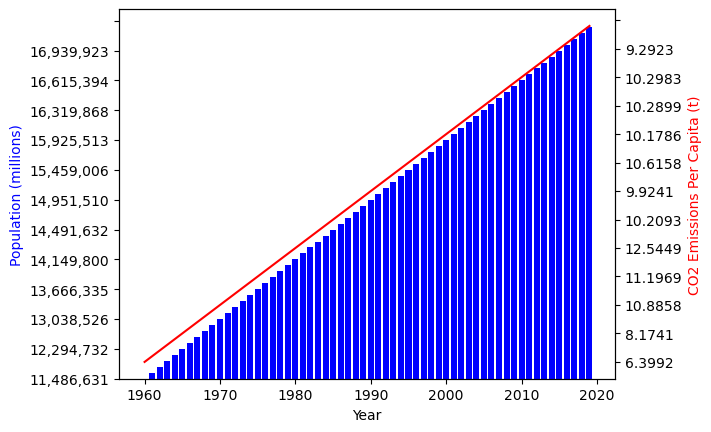

In [17]:
# Single country df
netherlands_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Netherlands']

# First plot, left hand side
netherlands_tickspacing_y1 = 5
netherlands_tickspacing_y2 = 5
fig, ax1 = plt.subplots()
ax1.bar(netherlands_data['year'], netherlands_data['population'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color='blue')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(netherlands_tickspacing_y1))

# Second plot, right hand side
ax2 = ax1.twinx()
ax2.plot(netherlands_data['year'], netherlands_data['emissions per capita (t)'], color='red')
ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(netherlands_tickspacing_y2))

plt.show()

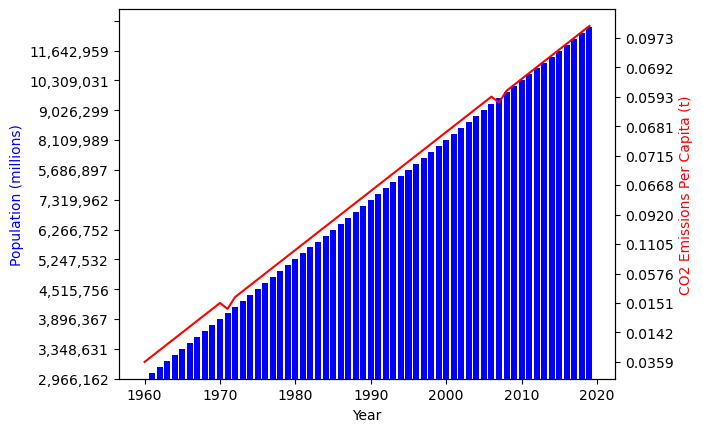

In [18]:
# Single country df
rwanda_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Rwanda']

# First plot, left hand side
rwanda_tickspacing_y1 = 5
rwanda_tickspacing_y2 = 5
fig, ax1 = plt.subplots()
ax1.bar(rwanda_data['year'], rwanda_data['population'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color='blue')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(rwanda_tickspacing_y1))

# Second plot, right hand side
ax2 = ax1.twinx()
ax2.plot(rwanda_data['year'], rwanda_data['emissions per capita (t)'], color='red')
ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(rwanda_tickspacing_y2))

plt.show()

In [19]:
samples_df = pd.read_csv('samples.csv', delimiter=';', names=['GEMS Station #', 'Date of Sample', 'Time of Sample', 'Depth of Sample',
                                                              'Parameter Tested', 'Analysis Method', 'Value Flags', 'Result', 'Unit', 'Data Quality'])
samples_df['Country Code'] = samples_df['GEMS Station #'].str[:3]
samples_df['GEMS #'] = samples_df['GEMS Station #'].str[3:]

samples_columns = samples_df.drop(['GEMS Station #', 'Value Flags', 'Data Quality'], axis=1)
samples_columns.head()

C:\Users\jraem\AppData\Local\Temp\ipykernel_1668\932155624.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  samples_df = pd.read_csv('samples.csv', delimiter=';', names=['GEMS Station #', 'Date of Sample', 'Time of Sample', 'Depth of Sample',


,Date of Sample,Time of Sample,Depth of Sample,Parameter Tested,Analysis Method,Result,Unit,Country Code,GEMS #
0,2016-04-29,00:00,5.88,pH,pH-POT-insitu,6.770,---,BDI,00002
1,2016-04-29,00:00,5.88,TSS,TSS-G,134.000,mg/l,BDI,00002
2,2016-04-29,00:00,5.88,NO2N,COL-AZO,0.036,mg/l,BDI,00002
3,2016-04-29,00:00,5.88,EC,EC-CND-FLD,51.000,µS/cm,BDI,00002
4,2016-04-29,00:00,5.88,TN,COL-AZO-Cd-PS,1.400,mg/l,BDI,00002


In [20]:
samples_allcountries = pd.read_csv('My CSV\waterPollution.csv')
samples_allcountries.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,GW,CAS_7440-43-9,total,water,ug/L,2016,2015-10-01--2016-09-30,25.00,ES040MSBT000030612,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
1,GW,CAS_16887-00-6,total,water,mg/L,2016,2015-10-01--2016-09-30,328.38,ES040MSBT000030612,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
2,GW,CAS_67-66-3,total,water,ug/L,2016,2015-10-01--2016-09-30,5.41,ES040MSBT000030612,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
3,GW,CAS_2921-88-2,total,water,ug/L,2016,2015-10-01--2016-09-30,0.02,ES040MSBT000030612,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
4,GW,CAS_35065-27-1,total,water,ug/L,2016,2015-10-01--2016-09-30,0.02,ES040MSBT000030612,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


In [21]:
slovak_countries = samples_allcountries.loc[samples_allcountries['Country'] == ('Czech Republic')]
slovak_countries.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
18,RW,CAS_15307-86-5,total,water,ug/L,2010,2010-01-25--2010-12-13,0.02000,CZHSL_2050,Czech Republic,...,62.3,2.4,8.4,14.9,9.1,2.2,0.0,0.7,0.0,25.5
19,RW,CAS_15307-86-5,total,water,ug/L,2010,2010-01-06--2010-12-08,0.19283,CZBER_0350,Czech Republic,...,62.3,2.4,8.4,14.9,9.1,2.2,0.0,0.7,0.0,25.5
20,RW,CAS_15307-86-5,total,water,ug/L,2011,2011-01-26--2011-12-14,0.02000,CZOHL_0200,Czech Republic,...,62.3,2.4,8.4,14.9,9.1,2.2,0.0,0.7,0.0,25.5
44,RW,CAS_138261-41-3,total,water,ug/L,2016,2016-01-12--2016-03-01,0.01000,CZDVL_0760,Czech Republic,...,62.3,2.4,8.4,14.9,9.1,2.2,0.0,0.7,0.0,25.5
80,RW,CAS_15307-86-5,total,water,ug/L,2014,2014-01-13--2014-11-27,0.02417,CZOHL_1370,Czech Republic,...,62.3,2.4,8.4,14.9,9.1,2.2,0.0,0.7,0.0,25.5


In [22]:
ph_columns = samples_columns.loc[samples_columns['Parameter Tested'] == 'pH']
ph_columns.head()

,Date of Sample,Time of Sample,Depth of Sample,Parameter Tested,Analysis Method,Result,Unit,Country Code,GEMS #
0,2016-04-29,00:00,5.88,pH,pH-POT-insitu,6.77,---,BDI,00002
15,2016-04-27,00:00,2.03,pH,pH-POT-insitu,7.40,---,BDI,00003
39,2016-04-26,00:00,2.28,pH,pH-POT-insitu,7.20,---,BDI,00004
47,2016-04-27,00:00,3.30,pH,pH-POT-insitu,6.90,---,BDI,00005
74,2016-04-27,00:00,0.70,pH,pH-POT-insitu,6.50,---,BDI,00006


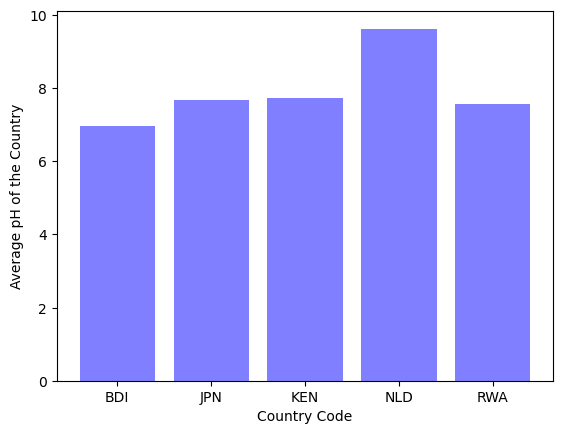

In [23]:
countries = ph_columns['Country Code'].unique()
average_ph = ph_columns.groupby(['Country Code'])['Result'].mean()

# print(countries)
# print(average_ph)

plt.bar(countries, average_ph, color='b', alpha=0.5, align="center")
plt.xlabel('Country Code')
plt.ylabel('Average pH of the Country')
plt.show()

In [24]:
samples_pollutants = samples_columns.loc[samples_columns['Parameter Tested'] != 'pH']
samples_pollutants.head()

,Date of Sample,Time of Sample,Depth of Sample,Parameter Tested,Analysis Method,Result,Unit,Country Code,GEMS #
1,2016-04-29,00:00,5.88,TSS,TSS-G,134.000,mg/l,BDI,00002
2,2016-04-29,00:00,5.88,NO2N,COL-AZO,0.036,mg/l,BDI,00002
3,2016-04-29,00:00,5.88,EC,EC-CND-FLD,51.000,µS/cm,BDI,00002
4,2016-04-29,00:00,5.88,TN,COL-AZO-Cd-PS,1.400,mg/l,BDI,00002
5,2016-04-29,00:00,5.88,NH4N,COL-PHE,0.280,mg/l,BDI,00002


In [25]:
average_pollutants = samples_pollutants.groupby(['Country Code'])['Result'].mean()
average_pollutants_df = pd.DataFrame(average_pollutants)
print(average_pollutants_df)

remove_nld = average_pollutants_df[average_pollutants_df.index != 'NLD']
print(remove_nld)


                    Result
Country Code              
BDI           3.841661e+01
CZE           2.374538e-02
JPN           1.806061e+02
KEN           5.252312e+01
NLD           5.700160e+06
RWA           7.258916e+01
                  Result
Country Code            
BDI            38.416614
CZE             0.023745
JPN           180.606109
KEN            52.523120
RWA            72.589159


['BDI', 'CZE', 'JPN', 'KEN', 'RWA']
[3.8420e+01 2.0000e-02 1.8061e+02 5.2520e+01 7.2590e+01]


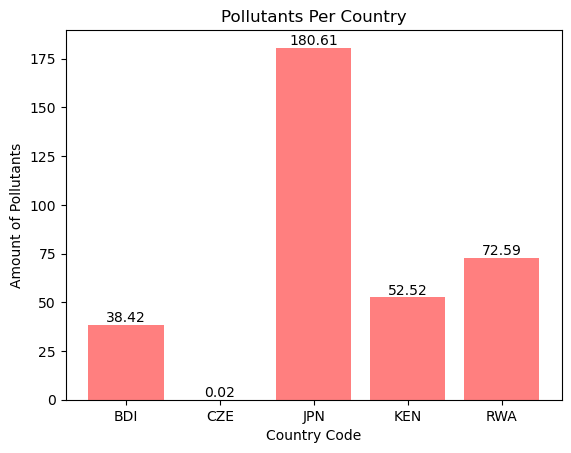

In [26]:
pol_yaxis_values = remove_nld['Result'].values
pol_yaxis = pol_yaxis_values.round(2)
pol_xaxis = remove_nld.index.to_list()
print(pol_xaxis)
print(pol_yaxis)

plt.bar(pol_xaxis, pol_yaxis, color='r', alpha=0.5, align="center")

for i, v in enumerate(pol_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Country Code')
plt.ylabel('Amount of Pollutants')
plt.title('Pollutants Per Country')

plt.show()

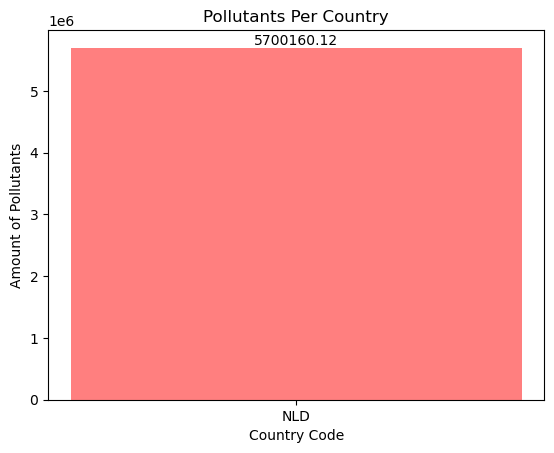

In [27]:
nld_poll = average_pollutants_df[average_pollutants_df.index == 'NLD']

nld_xaxis = nld_poll.index.to_list()
nld_yaxis = nld_poll['Result'].round(2)

for i, v in enumerate(nld_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Country Code')
plt.ylabel('Amount of Pollutants')
plt.title('Pollutants Per Country')

plt.bar(nld_xaxis, nld_yaxis, color='r', alpha=0.5, align='center')
plt.show()